# Dividir el dataset en conjunto de entrenamiento y de testing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../datasets/ads/Advertising.csv")

In [5]:
a = np.random.randn(len(data))

(array([ 5., 16., 28., 44., 35., 29., 19., 18.,  4.,  2.]),
 array([-2.23577103, -1.72851749, -1.22126395, -0.71401041, -0.20675687,
         0.30049667,  0.80775022,  1.31500376,  1.8222573 ,  2.32951084,
         2.83676438]),
 <a list of 10 Patch objects>)

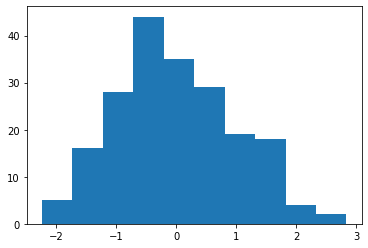

In [7]:
plt.hist(a)

In [8]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [11]:
len(training), len(testing)

(156, 44)

In [13]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio", data=training).fit()

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     658.2
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           6.93e-76
Time:                        20:25:54   Log-Likelihood:                -299.64
No. Observations:                 156   AIC:                             605.3
Df Residuals:                     153   BIC:                             614.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6623      0.346      7.691      0.000       1.978       3.346
TV             0.0467      0.002     29.791      0.000       0.044       0.050
Radio          0.1912      0.009     20.925      0.000       0.173       0.209
==============================================================================
Omnibus:                       51.084   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.503
Skew:                          -1.322   Prob(JB):                     8.40e-31
Kurtosis:                       6.784   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.6623 + 0.0467 * TV + 0.1912 * Radio

## Validación del modelo con el conjunto de testing

In [18]:
sales_pred = lm.predict(testing)
sales_pred

5      12.416446
7      12.018227
8       3.465035
13      8.664913
19     14.104856
20     18.149123
22      6.317833
26     14.931850
28     19.453012
32      7.484778
33     18.879665
35     17.011336
52     20.732172
54     20.426633
55     21.387556
58     21.981094
60      5.541139
65      7.659973
81     14.636130
84     20.845366
85     15.195307
87     15.589482
95     16.323490
97     15.305036
99     16.943041
101    23.432988
106     5.931738
107     6.938058
111    21.205447
127     6.404733
133    19.323238
138     9.620123
140     9.337302
150    18.418158
155     5.071159
161    13.505263
164    10.941502
165    14.254991
166    10.685538
180    10.466916
191     8.250044
194    16.453536
195     5.152166
196     7.994763
dtype: float64

In [22]:
SSD = sum((testing["Sales"]-sales_pred)**2)
SSD

133.5709582832601

In [23]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.8049454980168298

In [25]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.13256151212275166